In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from scipy.optimize import curve_fit
import shap
from tqdm import tqdm
import time, gc

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

F:\ProgramData\miniconda3\envs\nlp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data

In [2]:
col_labels = ['label_close2max',
'label_close3max',
'label_close5max',
'label_close10max',
'label_close15max',
'label_close20max',
'label_close2min',
'label_close3min',
'label_close5min',
'label_close10min',
'label_close15min',
'label_close20min',
'label_close2mean',
'label_close3mean',
'label_close5mean',
'label_close10mean',
'label_close15mean',
'label_close20mean',
'inc_close2mean_perc5',
'inc_close2mean_perc10',
'inc_close2mean_perc3',
'inc_close2max_perc5',
'inc_close2max_perc10',
'inc_close2max_perc3',
'inc_close3mean_perc5',
'inc_close3mean_perc10',
'inc_close3mean_perc3',
'inc_close3max_perc5',
'inc_close3max_perc10',
'inc_close3max_perc3',
'inc_close5mean_perc5',
'inc_close5mean_perc10',
'inc_close5mean_perc3',
'inc_close5max_perc5',
'inc_close5max_perc10',
'inc_close5max_perc3',
'inc_close10mean_perc5',
'inc_close10mean_perc10',
'inc_close10mean_perc3',
'inc_close10max_perc5',
'inc_close10max_perc10',
'inc_close10max_perc3',
'dec_close2mean_perc5',
'dec_close2mean_perc10',
'dec_close2mean_perc3',
'dec_close2min_perc5',
'dec_close2min_perc10',
'dec_close2min_perc3',
'dec_close3mean_perc5',
'dec_close3mean_perc10',
'dec_close3mean_perc3',
'dec_close3min_perc5',
'dec_close3min_perc10',
'dec_close3min_perc3',
'dec_close5mean_perc5',
'dec_close5mean_perc10',
'dec_close5mean_perc3',
'dec_close5min_perc5',
'dec_close5min_perc10',
'dec_close5min_perc3',
'dec_close10mean_perc5',
'dec_close10mean_perc10',
'dec_close10mean_perc3',
'dec_close10min_perc5',
'dec_close10min_perc10',
'dec_close10min_perc3',
'inc_close2mean_perc7',
'inc_close2max_perc7',
'inc_close3mean_perc7',
'inc_close3max_perc7',
'inc_close5mean_perc7',
'inc_close5max_perc7',
'inc_close10mean_perc7',
'inc_close10max_perc7',
'dec_close2mean_perc7',
'dec_close2min_perc7',
'dec_close3mean_perc7',
'dec_close3min_perc7',
'dec_close5mean_perc7',
'dec_close5min_perc7',
'dec_close10mean_perc7',
'dec_close10min_perc7']

In [3]:
cols_feat = ['RSI_3',
'RSI_5',
'RSI_10',
'RSI_15',
'RSI_20',
'RSI_60',
'RSI_120',
'ADX_3',
'DMP_3',
'DMN_3',
'ADX_5',
'DMP_5',
'DMN_5',
'ADX_10',
'DMP_10',
'DMN_10',
'ADX_15',
'DMP_15',
'DMN_15',
'ADX_20',
'DMP_20',
'DMN_20',
'ADX_60',
'DMP_60',
'DMN_60',
'ADX_120',
'DMP_120',
'DMN_120',
'OBV',
'STOCHk_14_3_3',
'STOCHd_14_3_3',
'ISA_9',
'ISB_26',
'ITS_9',
'IKS_26',
'grad_MACD_5_10_9',
'diff_MACD_5_10_9',
'grad_MACDh_5_10_9',
'diff_MACDh_5_10_9',
'grad_MACDs_5_10_9',
'diff_MACDs_5_10_9',
'grad_DMP_3',
'grad_DMN_3',
'grad_RSI_3',
'diff_RSI_3',
'grad_EMA_3',
'diff_EMA_3',
'grad_BBL_3',
'diff_BBL_3',
'grad_BBM_3',
'diff_BBM_3',
'grad_BBU_3',
'diff_BBU_3',
'grad_BBB_3',
'diff_BBB_3',
'grad_BBP_3',
'diff_BBP_3',
'r_close_bbl_3',
'r_close_bbu_3',
'r_close_bbm_3',
'r_close_bbb_3',
'r_close_bbp_3',
'r_open_bbl_3',
'r_open_bbu_3',
'r_open_bbm_3',
'r_open_bbb_3',
'r_open_bbp_3',
'r_low_bbl_3',
'r_low_bbu_3',
'r_low_bbm_3',
'r_low_bbb_3',
'r_low_bbp_3',
'r_high_bbl_3',
'r_high_bbu_3',
'r_high_bbm_3',
'r_high_bbb_3',
'r_high_bbp_3',
'r_close_rsi_3',
'r_open_rsi_3',
'r_low_rsi_3',
'r_high_rsi_3',
'r_close_EMA_3',
'r_open_EMA_3',
'r_low_EMA_3',
'r_high_EMA_3',
'r_close_SMA_3',
'r_open_SMA_3',
'r_low_SMA_3',
'r_high_SMA_3',
'r_sma3_bbl_3',
'r_sma3_bbu_3',
'r_sma3_bbm_3',
'r_sma3_bbb_3',
'r_sma3_bbp_3',
'r_sma5_bbl_3',
'r_sma5_bbu_3',
'r_sma5_bbm_3',
'r_sma5_bbb_3',
'r_sma5_bbp_3',
'r_dmp_adx_3',
'r_dmn_adx_3',
'grad_DMP_5',
'grad_DMN_5',
'grad_RSI_5',
'diff_RSI_5',
'grad_EMA_5',
'diff_EMA_5',
'grad_BBL_5',
'diff_BBL_5',
'grad_BBM_5',
'diff_BBM_5',
'grad_BBU_5',
'diff_BBU_5',
'grad_BBB_5',
'diff_BBB_5',
'grad_BBP_5',
'diff_BBP_5',
'r_close_bbl_5',
'r_close_bbu_5',
'r_close_bbm_5',
'r_close_bbb_5',
'r_close_bbp_5',
'r_open_bbl_5',
'r_open_bbu_5',
'r_open_bbm_5',
'r_open_bbb_5',
'r_open_bbp_5',
'r_low_bbl_5',
'r_low_bbu_5',
'r_low_bbm_5',
'r_low_bbb_5',
'r_low_bbp_5',
'r_high_bbl_5',
'r_high_bbu_5',
'r_high_bbm_5',
'r_high_bbb_5',
'r_high_bbp_5',
'r_close_rsi_5',
'r_open_rsi_5',
'r_low_rsi_5',
'r_high_rsi_5',
'r_close_EMA_5',
'r_open_EMA_5',
'r_low_EMA_5',
'r_high_EMA_5',
'r_close_SMA_5',
'r_open_SMA_5',
'r_low_SMA_5',
'r_high_SMA_5',
'r_sma3_bbl_5',
'r_sma3_bbu_5',
'r_sma3_bbm_5',
'r_sma3_bbb_5',
'r_sma3_bbp_5',
'r_sma5_bbl_5',
'r_sma5_bbu_5',
'r_sma5_bbm_5',
'r_sma5_bbb_5',
'r_sma5_bbp_5',
'r_dmp_adx_5',
'r_dmn_adx_5',
'grad_DMP_10',
'grad_DMN_10',
'grad_RSI_10',
'diff_RSI_10',
'grad_EMA_10',
'diff_EMA_10',
'grad_BBL_10',
'diff_BBL_10',
'grad_BBM_10',
'diff_BBM_10',
'grad_BBU_10',
'diff_BBU_10',
'grad_BBB_10',
'diff_BBB_10',
'grad_BBP_10',
'diff_BBP_10',
'r_close_bbl_10',
'r_close_bbu_10',
'r_close_bbm_10',
'r_close_bbb_10',
'r_close_bbp_10',
'r_open_bbl_10',
'r_open_bbu_10',
'r_open_bbm_10',
'r_open_bbb_10',
'r_open_bbp_10',
'r_low_bbl_10',
'r_low_bbu_10',
'r_low_bbm_10',
'r_low_bbb_10',
'r_low_bbp_10',
'r_high_bbl_10',
'r_high_bbu_10',
'r_high_bbm_10',
'r_high_bbb_10',
'r_high_bbp_10',
'r_close_rsi_10',
'r_open_rsi_10',
'r_low_rsi_10',
'r_high_rsi_10',
'r_close_EMA_10',
'r_open_EMA_10',
'r_low_EMA_10',
'r_high_EMA_10',
'r_close_SMA_10',
'r_open_SMA_10',
'r_low_SMA_10',
'r_high_SMA_10',
'r_sma3_bbl_10',
'r_sma3_bbu_10',
'r_sma3_bbm_10',
'r_sma3_bbb_10',
'r_sma3_bbp_10',
'r_sma5_bbl_10',
'r_sma5_bbu_10',
'r_sma5_bbm_10',
'r_sma5_bbb_10',
'r_sma5_bbp_10',
'r_dmp_adx_10',
'r_dmn_adx_10',
'grad_DMP_15',
'grad_DMN_15',
'grad_RSI_15',
'diff_RSI_15',
'grad_EMA_15',
'diff_EMA_15',
'grad_BBL_15',
'diff_BBL_15',
'grad_BBM_15',
'diff_BBM_15',
'grad_BBU_15',
'diff_BBU_15',
'grad_BBB_15',
'diff_BBB_15',
'grad_BBP_15',
'diff_BBP_15',
'r_close_bbl_15',
'r_close_bbu_15',
'r_close_bbm_15',
'r_close_bbb_15',
'r_close_bbp_15',
'r_open_bbl_15',
'r_open_bbu_15',
'r_open_bbm_15',
'r_open_bbb_15',
'r_open_bbp_15',
'r_low_bbl_15',
'r_low_bbu_15',
'r_low_bbm_15',
'r_low_bbb_15',
'r_low_bbp_15',
'r_high_bbl_15',
'r_high_bbu_15',
'r_high_bbm_15',
'r_high_bbb_15',
'r_high_bbp_15',
'r_close_rsi_15',
'r_open_rsi_15',
'r_low_rsi_15',
'r_high_rsi_15',
'r_close_EMA_15',
'r_open_EMA_15',
'r_low_EMA_15',
'r_high_EMA_15',
'r_close_SMA_15',
'r_open_SMA_15',
'r_low_SMA_15',
'r_high_SMA_15',
'r_sma3_bbl_15',
'r_sma3_bbu_15',
'r_sma3_bbm_15',
'r_sma3_bbb_15',
'r_sma3_bbp_15',
'r_sma5_bbl_15',
'r_sma5_bbu_15',
'r_sma5_bbm_15',
'r_sma5_bbb_15',
'r_sma5_bbp_15',
'r_dmp_adx_15',
'r_dmn_adx_15',
'grad_DMP_20',
'grad_DMN_20',
'grad_RSI_20',
'diff_RSI_20',
'grad_EMA_20',
'diff_EMA_20',
'grad_BBL_20',
'diff_BBL_20',
'grad_BBM_20',
'diff_BBM_20',
'grad_BBU_20',
'diff_BBU_20',
'grad_BBB_20',
'diff_BBB_20',
'grad_BBP_20',
'diff_BBP_20',
'r_close_bbl_20',
'r_close_bbu_20',
'r_close_bbm_20',
'r_close_bbb_20',
'r_close_bbp_20',
'r_open_bbl_20',
'r_open_bbu_20',
'r_open_bbm_20',
'r_open_bbb_20',
'r_open_bbp_20',
'r_low_bbl_20',
'r_low_bbu_20',
'r_low_bbm_20',
'r_low_bbb_20',
'r_low_bbp_20',
'r_high_bbl_20',
'r_high_bbu_20',
'r_high_bbm_20',
'r_high_bbb_20',
'r_high_bbp_20',
'r_close_rsi_20',
'r_open_rsi_20',
'r_low_rsi_20',
'r_high_rsi_20',
'r_close_EMA_20',
'r_open_EMA_20',
'r_low_EMA_20',
'r_high_EMA_20',
'r_close_SMA_20',
'r_open_SMA_20',
'r_low_SMA_20',
'r_high_SMA_20',
'r_sma3_bbl_20',
'r_sma3_bbu_20',
'r_sma3_bbm_20',
'r_sma3_bbb_20',
'r_sma3_bbp_20',
'r_sma5_bbl_20',
'r_sma5_bbu_20',
'r_sma5_bbm_20',
'r_sma5_bbb_20',
'r_sma5_bbp_20',
'r_dmp_adx_20',
'r_dmn_adx_20',
'grad_DMP_60',
'grad_DMN_60',
'grad_RSI_60',
'diff_RSI_60',
'grad_EMA_60',
'diff_EMA_60',
'grad_BBL_60',
'diff_BBL_60',
'grad_BBM_60',
'diff_BBM_60',
'grad_BBU_60',
'diff_BBU_60',
'grad_BBB_60',
'diff_BBB_60',
'grad_BBP_60',
'diff_BBP_60',
'r_close_bbl_60',
'r_close_bbu_60',
'r_close_bbm_60',
'r_close_bbb_60',
'r_close_bbp_60',
'r_open_bbl_60',
'r_open_bbu_60',
'r_open_bbm_60',
'r_open_bbb_60',
'r_open_bbp_60',
'r_low_bbl_60',
'r_low_bbu_60',
'r_low_bbm_60',
'r_low_bbb_60',
'r_low_bbp_60',
'r_high_bbl_60',
'r_high_bbu_60',
'r_high_bbm_60',
'r_high_bbb_60',
'r_high_bbp_60',
'r_close_rsi_60',
'r_open_rsi_60',
'r_low_rsi_60',
'r_high_rsi_60',
'r_close_EMA_60',
'r_open_EMA_60',
'r_low_EMA_60',
'r_high_EMA_60',
'r_close_SMA_60',
'r_open_SMA_60',
'r_low_SMA_60',
'r_high_SMA_60',
'r_sma3_bbl_60',
'r_sma3_bbu_60',
'r_sma3_bbm_60',
'r_sma3_bbb_60',
'r_sma3_bbp_60',
'r_sma5_bbl_60',
'r_sma5_bbu_60',
'r_sma5_bbm_60',
'r_sma5_bbb_60',
'r_sma5_bbp_60',
'r_dmp_adx_60',
'r_dmn_adx_60',
'grad_DMP_120',
'grad_DMN_120',
'grad_RSI_120',
'diff_RSI_120',
'grad_EMA_120',
'diff_EMA_120',
'grad_BBL_120',
'diff_BBL_120',
'grad_BBM_120',
'diff_BBM_120',
'grad_BBU_120',
'diff_BBU_120',
'grad_BBB_120',
'diff_BBB_120',
'grad_BBP_120',
'diff_BBP_120',
'r_close_bbl_120',
'r_close_bbu_120',
'r_close_bbm_120',
'r_close_bbb_120',
'r_close_bbp_120',
'r_open_bbl_120',
'r_open_bbu_120',
'r_open_bbm_120',
'r_open_bbb_120',
'r_open_bbp_120',
'r_low_bbl_120',
'r_low_bbu_120',
'r_low_bbm_120',
'r_low_bbb_120',
'r_low_bbp_120',
'r_high_bbl_120',
'r_high_bbu_120',
'r_high_bbm_120',
'r_high_bbb_120',
'r_high_bbp_120',
'r_close_rsi_120',
'r_open_rsi_120',
'r_low_rsi_120',
'r_high_rsi_120',
'r_close_EMA_120',
'r_open_EMA_120',
'r_low_EMA_120',
'r_high_EMA_120',
'r_close_SMA_120',
'r_open_SMA_120',
'r_low_SMA_120',
'r_high_SMA_120',
'r_sma3_bbl_120',
'r_sma3_bbu_120',
'r_sma3_bbm_120',
'r_sma3_bbb_120',
'r_sma3_bbp_120',
'r_sma5_bbl_120',
'r_sma5_bbu_120',
'r_sma5_bbm_120',
'r_sma5_bbb_120',
'r_sma5_bbp_120',
'r_dmp_adx_120',
'r_dmn_adx_120',
'r_rsi_3_5',
'r_rsi_3_10',
'r_rsi_5_10',
'r_rsi_5_15',
'r_rsi_10_15',
'r_rsi_10_20',
'r_rsi_15_20',
'r_rsi_15_60',
'r_rsi_20_60',
'r_rsi_20_120',
'r_rsi_60_120',
'r_ema_close_3',
'r_ema_close_5',
'r_ema_3_5',
'r_ema_3_10',
'r_ema_5_10',
'r_ema_5_15',
'r_ema_10_15',
'r_ema_10_20',
'r_ema_15_20',
'r_ema_15_60',
'r_ema_20_60',
'r_ema_20_120',
'r_ema_60_120',
'r_stoch_k_d',
'up5',
'down5',
'up10',
'down10',
'up20',
'down20',
'up60',
'down60',
'up120',
'down120',
'r_up_down5',
'r_up_down10',
'r_up_down20',
'r_up_down60',
'r_up_down120',
'r_curr_vol_5',
'r_curr_vol_10',
'r_curr_vol_20',
'r_curr_vol_60',
'r_curr_vol_120',
'intraday_direction',
'perc_max_spread_to_close',
'perc_max_spread_to_open',
'r_av_v5_10',
'r_av_v5_20',
'r_av_v5_60',
'r_av_v10_20',
'r_av_v10_60',
'r_av_v10_120',
'r_av_v20_60',
'r_av_v20_120',
'r_av_v60_120',]

In [4]:
# data = pd.read_parquet("datas//ml_data//ml_feature_label_BAC.parquet")

data = pd.read_parquet("datas//ml_data2//all_train.parquet")
df_full_test = pd.read_parquet("datas//ml_data2//all_test.parquet")
df_full_l20d = pd.read_parquet("datas//ml_data2//all_current.parquet")

In [5]:
# for i in data.columns:
#     print(f"'{i}',")

In [6]:
data = data.dropna(subset=cols_feat)
df_full_test = df_full_test.dropna(subset=cols_feat)
df_full_l20d = df_full_l20d.dropna(subset=cols_feat)

In [7]:
data['day'] = data['date'].dt.strftime("%Y%m%d").astype('int')

In [8]:
data.head()

,date,close,open,high,low,volume,RSI_3,RSI_5,RSI_10,RSI_15,RSI_20,RSI_60,RSI_120,EMA_3,EMA_5,EMA_10,EMA_15,EMA_20,EMA_60,EMA_120,SMA_3,SMA_5,SMA_10,SMA_15,SMA_20,SMA_60,SMA_120,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0,BBL_15_2.0,BBM_15_2.0,BBU_15_2.0,BBB_15_2.0,BBP_15_2.0,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,BBL_60_2.0,BBM_60_2.0,BBU_60_2.0,BBB_60_2.0,BBP_60_2.0,BBL_120_2.0,BBM_120_2.0,BBU_120_2.0,BBB_120_2.0,BBP_120_2.0,ADX_3,DMP_3,DMN_3,ADX_5,DMP_5,DMN_5,ADX_10,DMP_10,DMN_10,ADX_15,DMP_15,DMN_15,ADX_20,DMP_20,DMN_20,ADX_60,DMP_60,DMN_60,ADX_120,DMP_120,DMN_120,OBV,STOCHk_14_3_3,STOCHd_14_3_3,ISA_9,ISB_26,ITS_9,IKS_26,MACD_5_10_9,MACDh_5_10_9,MACDs_5_10_9,grad_MACD_5_10_9,diff_MACD_5_10_9,grad_MACDh_5_10_9,diff_MACDh_5_10_9,grad_MACDs_5_10_9,diff_MACDs_5_10_9,grad_DMP_3,grad_DMN_3,grad_RSI_3,diff_RSI_3,grad_EMA_3,diff_EMA_3,grad_BBL_3,diff_BBL_3,grad_BBM_3,diff_BBM_3,grad_BBU_3,diff_BBU_3,grad_BBB_3,diff_BBB_3,grad_BBP_3,diff_BBP_3,r_close_bbl_3,r_close_bbu_3,r_close_bbm_3,r_close_bbb_3,r_close_bbp_3,r_open_bbl_3,r_open_bbu_3,r_open_bbm_3,r_open_bbb_3,r_open_bbp_3,r_low_bbl_3,r_low_bbu_3,r_low_bbm_3,r_low_bbb_3,r_low_bbp_3,r_high_bbl_3,r_high_bbu_3,r_high_bbm_3,r_high_bbb_3,r_high_bbp_3,r_close_rsi_3,r_open_rsi_3,r_low_rsi_3,r_high_rsi_3,r_close_EMA_3,r_open_EMA_3,r_low_EMA_3,r_high_EMA_3,r_close_SMA_3,r_open_SMA_3,r_low_SMA_3,r_high_SMA_3,r_sma3_bbl_3,r_sma3_bbu_3,r_sma3_bbm_3,r_sma3_bbb_3,r_sma3_bbp_3,r_sma5_bbl_3,r_sma5_bbu_3,r_sma5_bbm_3,r_sma5_bbb_3,r_sma5_bbp_3,r_dmp_adx_3,r_dmn_adx_3,grad_DMP_5,grad_DMN_5,grad_RSI_5,diff_RSI_5,grad_EMA_5,diff_EMA_5,grad_BBL_5,diff_BBL_5,grad_BBM_5,diff_BBM_5,grad_BBU_5,diff_BBU_5,grad_BBB_5,diff_BBB_5,grad_BBP_5,diff_BBP_5,r_close_bbl_5,r_close_bbu_5,r_close_bbm_5,r_close_bbb_5,r_close_bbp_5,r_open_bbl_5,r_open_bbu_5,r_open_bbm_5,r_open_bbb_5,r_open_bbp_5,r_low_bbl_5,r_low_bbu_5,r_low_bbm_5,r_low_bbb_5,r_low_bbp_5,r_high_bbl_5,r_high_bbu_5,r_high_bbm_5,r_high_bbb_5,r_high_bbp_5,r_close_rsi_5,r_open_rsi_5,r_low_rsi_5,r_high_rsi_5,r_close_EMA_5,r_open_EMA_5,r_low_EMA_5,r_high_EMA_5,r_close_SMA_5,r_open_SMA_5,r_low_SMA_5,r_high_SMA_5,r_sma3_bbl_5,r_sma3_bbu_5,r_sma3_bbm_5,r_sma3_bbb_5,r_sma3_bbp_5,r_sma5_bbl_5,r_sma5_bbu_5,r_sma5_bbm_5,r_sma5_bbb_5,r_sma5_bbp_5,r_dmp_adx_5,r_dmn_adx_5,grad_DMP_10,grad_DMN_10,grad_RSI_10,diff_RSI_10,grad_EMA_10,diff_EMA_10,grad_BBL_10,diff_BBL_10,grad_BBM_10,diff_BBM_10,grad_BBU_10,diff_BBU_10,grad_BBB_10,diff_BBB_10,grad_BBP_10,diff_BBP_10,r_close_bbl_10,r_close_bbu_10,r_close_bbm_10,r_close_bbb_10,r_close_bbp_10,r_open_bbl_10,r_open_bbu_10,r_open_bbm_10,r_open_bbb_10,r_open_bbp_10,r_low_bbl_10,r_low_bbu_10,r_low_bbm_10,r_low_bbb_10,r_low_bbp_10,r_high_bbl_10,r_high_bbu_10,r_high_bbm_10,r_high_bbb_10,r_high_bbp_10,r_close_rsi_10,r_open_rsi_10,r_low_rsi_10,r_high_rsi_10,r_close_EMA_10,r_open_EMA_10,r_low_EMA_10,r_high_EMA_10,r_close_SMA_10,r_open_SMA_10,r_low_SMA_10,r_high_SMA_10,r_sma3_bbl_10,r_sma3_bbu_10,r_sma3_bbm_10,r_sma3_bbb_10,r_sma3_bbp_10,r_sma5_bbl_10,r_sma5_bbu_10,r_sma5_bbm_10,r_sma5_bbb_10,r_sma5_bbp_10,r_dmp_adx_10,r_dmn_adx_10,grad_DMP_15,grad_DMN_15,grad_RSI_15,diff_RSI_15,grad_EMA_15,diff_EMA_15,grad_BBL_15,diff_BBL_15,grad_BBM_15,diff_BBM_15,grad_BBU_15,diff_BBU_15,grad_BBB_15,diff_BBB_15,grad_BBP_15,diff_BBP_15,r_close_bbl_15,r_close_bbu_15,r_close_bbm_15,r_close_bbb_15,r_close_bbp_15,r_open_bbl_15,r_open_bbu_15,r_open_bbm_15,r_open_bbb_15,r_open_bbp_15,r_low_bbl_15,r_low_bbu_15,r_low_bbm_15,r_low_bbb_15,r_low_bbp_15,r_high_bbl_15,r_high_bbu_15,r_high_bbm_15,r_high_bbb_15,r_high_bbp_15,r_close_rsi_15,r_open_rsi_15,r_low_rsi_15,r_high_rsi_15,r_close_EMA_15,r_open_EMA_15,r_low_EMA_15,r_high_EMA_15,r_close_SMA_15,r_open_SMA_15,r_low_SMA_15,r_high_SMA_15,r_sma3_bbl_15,r_sma3_bbu_15,r_sma3_bbm_15,r_sma3_bbb_15,r_sma3_bbp_15,r_sma5_bbl_15,r_sma5_bbu_15,r_sma5_bbm_15,r_sma5_bbb_15,r_sma5_bbp_15,r_dmp_adx_15,r_dmn_

# Metadata

In [9]:
col_target = 'inc_close3mean_perc5'
col_target_dec = 'dec_close3mean_perc5'

In [10]:
col_target_sig = 'inc_dec'
df_full_test[col_target_sig] = 0
df_full_l20d[col_target_sig] = 0
data[col_target_sig] = 0
data.loc[(data[col_target]==1)|(data[col_target_dec]==1), col_target_sig] = 1
df_full_test.loc[(df_full_test[col_target]==1)|(df_full_test[col_target_dec]==1), col_target_sig] = 1
df_full_l20d.loc[(df_full_l20d[col_target]==1)|(df_full_l20d[col_target_dec]==1), col_target_sig] = 1

In [11]:
data.loc[(data[col_target]==1)&(data[col_target_dec]==1), col_target].shape

(0,)

In [12]:
data[col_target_sig].value_counts()/data[col_target_sig].count()

inc_dec
0    0.854882
1    0.145118
Name: count, dtype: float64

# Train test split

In [13]:
count_train = int(data.shape[0]*0.75//1)
count_test = int(data.shape[0] - count_train)

In [14]:
print(f"{count_train} {count_test}")

265754 88585


In [15]:
# index_train = data.index[0:count_train]
# index_test = data.index[count_train:]

In [16]:
from sklearn.model_selection import train_test_split

index_train, index_test, y_train, y_valid = train_test_split(data[cols_feat], data[col_target], test_size=0.25, random_state=42, stratify=data[col_target])

In [17]:
index_train = index_train.index 
index_test = index_test.index

# Logistic Regression (increase price)

## Feature Transformation

### Discritization

In [49]:
from feature_engine.discretisation import DecisionTreeDiscretiser

data_used= data[cols_feat + [col_target]].copy()
data_used[cols_feat] = data[cols_feat].fillna(-999.99)

disc = DecisionTreeDiscretiser(bin_output="prediction",
                               cv=5,
                               scoring='roc_auc',
                               variables=cols_feat,
                               param_grid={'max_leaf_nodes': [2,3,4]},
                               regression=False)

disc.fit(data_used.loc[index_train, cols_feat], data_used.loc[index_train, col_target])

DecisionTreeDiscretiser(cv=5, param_grid={'max_leaf_nodes': [2, 3, 4]},
                        regression=False, scoring='roc_auc',
                        variables=['RSI_3', 'RSI_5', 'RSI_10', 'RSI_15',
                                   'RSI_20', 'RSI_60', 'RSI_120', 'ADX_3',
                                   'DMP_3', 'DMN_3', 'ADX_5', 'DMP_5', 'DMN_5',
                                   'ADX_10', 'DMP_10', 'DMN_10', 'ADX_15',
                                   'DMP_15', 'DMN_15', 'ADX_20', 'DMP_20',
                                   'DMN_20', 'ADX_60', 'DMP_60', 'DMN_60',
                                   'ADX_120', 'DMP_120', 'DMN_120', 'OBV',
                                   'STOCHk_14_3_3', ...])

In [59]:
data_used= data[cols_feat + [col_target]].copy()
data_used[cols_feat] = data_used[cols_feat].fillna(-999.99)
data_t = disc.transform(data_used[cols_feat])

data_used= df_full_test[cols_feat + [col_target]].copy()
data_used[cols_feat] = data_used[cols_feat].fillna(-999.99)
df_full_test_t = disc.transform(data_used[cols_feat])

data_used= df_full_l20d[cols_feat + [col_target]].copy()
data_used[cols_feat] = data_used[cols_feat].fillna(-999.99)
df_full_l20d_t = disc.transform(data_used[cols_feat])

In [62]:
del data_used
gc.collect()

71

#### Save transformer

In [92]:
import joblib
import json

# save model with joblib 
filename = 'discretization_fe.sav'
joblib.dump(disc, filename)

model_dict = dict()
model_dict['imputer'] = -99
model_dict['feature_names'] = disc.feature_names_in_
model_dict['variable'] = disc.variables_

with open("discritizer_fe_properties.json", "w") as outfile: 
    json.dump(model_dict, outfile)

## Feature Selection

#### High univariate AUC + Correlation

In [63]:
corr_mat_lr = data_t.loc[index_train].corr()

In [64]:
from sklearn.metrics import roc_auc_score

feature_auc = pd.Series(index=cols_feat)

for icol in cols_feat:
    temp_mask = (data_t.index.isin(index_train)) & (data[col_target].isnull()==False) & (data[icol].isnull()==False)
    feature_auc.loc[icol] = roc_auc_score(data.loc[temp_mask, col_target], data_t.loc[temp_mask, icol])

In [65]:
feature_auc.loc[feature_auc<0.5] = 1 - feature_auc.loc[feature_auc<0.5]
feature_auc.sort_values(ascending=False, inplace=True)
display(feature_auc)

perc_max_spread_to_open     0.729896
perc_max_spread_to_close    0.729497
r_low_bbb_20                0.728739
r_close_bbb_120             0.728428
r_close_bbb_20              0.728183
r_low_bbb_15                0.727517
r_sma3_bbb_20               0.727297
r_open_bbb_15               0.727124
r_close_bbb_15              0.727071
r_open_bbb_10               0.726937
r_close_bbb_10              0.726885
r_sma3_bbb_120              0.726844
r_low_bbb_10                0.726812
r_sma5_bbb_10               0.726740
r_open_bbb_20               0.726722
r_open_bbb_120              0.726709
r_sma5_bbb_15               0.726676
r_sma3_bbb_15               0.726600
r_sma5_bbb_120              0.726430
r_high_bbb_20               0.726283
r_high_bbb_10               0.726168
r_sma3_bbb_10               0.725870
r_low_bbb_120               0.725763
r_sma5_bbb_20               0.725610
r_high_bbb_15               0.725397
r_close_bbb_60              0.725120
r_low_bbb_5                 0.725035
r

In [66]:
use_feats = feature_auc.index.tolist()
def corr_gain(list_feat, corr_mat, list_use, thc=0.4):
    if len(list_feat)>0:
        mat_corr = corr_mat.loc[list_feat[0], list_feat[1:]].abs()
        del_mat = mat_corr.loc[mat_corr>thc].index.to_list()
        list_feat = [ifeat for ifeat in list_feat if ifeat not in del_mat]
        list_use.append(list_feat[0])
        list_feat = list_feat[1:]
        corr_gain(list_feat, corr_mat, list_use)
    else:
        return None

In [67]:
list_use = list()
list_feat = feature_auc.index.tolist()

corr_gain(list_feat, corr_mat_lr, list_use)
len(list_use)

53

### LogReg feature selection

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris  # Example dataset; replace with your dataset
from sklearn.metrics import accuracy_score

# Load example dataset
X = pd.DataFrame(data_t, columns=list_use)
y = data[col_target]

# Initialize variables
selected_features = []  # Keep track of selected features
remaining_features = list(X.columns)  # Start with all features as candidates
best_score = 0  # Best score initialized to 0

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Forward Feature Selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select current features (selected + new candidate feature)
        current_features = selected_features + [feature]
        # Perform cross-validation with the current feature set
        cv_score = np.mean(cross_val_score(model, X[current_features], y, cv=5, scoring='roc_auc'))
        scores.append((cv_score, feature))

    # Select the feature with the highest score
    scores.sort(reverse=True)
    best_new_score, best_new_feature = scores[0]

    # Check if adding this feature improves performance
    if best_new_score > best_score:
        best_score = best_new_score
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        print(f"Feature '{best_new_feature}' added with score: {best_new_score}")
    else:
        # Stop if no improvement
        print("No improvement, stopping feature selection.")
        break

print(f"\nSelected features: {selected_features}")
print(f"Best cross-validated score: {best_score}")

Feature 'perc_max_spread_to_open' added with score: 0.7280813049686488
Feature 'r_high_rsi_120' added with score: 0.7597086603996691
Feature 'r_open_bbl_120' added with score: 0.769494576258381
Feature 'RSI_120' added with score: 0.7742190076499872
Feature 'grad_BBB_20' added with score: 0.7759559103051854
Feature 'grad_BBB_5' added with score: 0.7768412970270422
Feature 'grad_BBU_120' added with score: 0.7777392883702153
Feature 'grad_BBU_5' added with score: 0.7783982147079984
Feature 'grad_BBB_10' added with score: 0.7785366486943358
Feature 'r_dmn_adx_10' added with score: 0.7789330324978786
Feature 'diff_BBU_15' added with score: 0.7791417900233839
No improvement, stopping feature selection.

Selected features: ['perc_max_spread_to_open', 'r_high_rsi_120', 'r_open_bbl_120', 'RSI_120', 'grad_BBB_20', 'grad_BBB_5', 'grad_BBU_120', 'grad_BBU_5', 'grad_BBB_10', 'r_dmn_adx_10', 'diff_BBU_15']
Best cross-validated score: 0.7791417900233839


In [70]:
selected_features

['perc_max_spread_to_open',
 'r_high_rsi_120',
 'r_open_bbl_120',
 'RSI_120',
 'grad_BBB_20',
 'grad_BBB_5',
 'grad_BBU_120',
 'grad_BBU_5',
 'grad_BBB_10',
 'r_dmn_adx_10',
 'diff_BBU_15']

In [71]:
feats_lr = selected_features[:4]

## Modelling

In [73]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from optuna.samplers import TPESampler

# Load dataset
X = pd.DataFrame(data_t.loc[index_train.tolist() + index_test.tolist()], columns=feats_lr)
y = data.loc[index_train.tolist() + index_test.tolist(), col_target]

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    penalty = 'l2'
    
    # Create Logistic Regression model with trial parameters
    model = LogisticRegression(C=C, solver=solver, penalty=penalty, max_iter=1000)
    
    # Use a pipeline to scale features
    pipeline = Pipeline([('scaler', StandardScaler()), ('lr', model)])
    
    # Evaluate model with cross-validation
    score = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc').mean()
    return score

# Create study and optimize
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50)

[I 2024-10-27 22:29:23,988] A new study created in memory with name: no-name-0b7e2cc1-5103-4a2e-a6a8-ba71c227c805
C:\Users\arifn\AppData\Local\Temp\ipykernel_22028\1915363799.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-10-27 22:29:30,667] Trial 0 finished with value: 0.7753633255032222 and parameters: {'C': 0.0034004505836535085, 'solver': 'saga'}. Best is trial 0 with value: 0.7753633255032222.
C:\Users\arifn\AppData\Local\Temp\ipykernel_22028\1915363799.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-10-27 22:29:32,275] Trial 1 finished with value: 0

In [74]:
print("Best hyperparameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

Best hyperparameters: {'C': 0.00011764253101367103, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7754958064784887


In [75]:
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
X = pd.DataFrame(data_t, columns=list_use)
y = data[col_target]


# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, C=study.best_params['C'])

# Train the model
model.fit(X, y)

# Make predictions on the test set
data['prediction_lr'] = model.predict_proba(data_t[list_use])[:,1]
df_full_test['prediction_lr'] = model.predict_proba(df_full_test_t[list_use])[:,1]
df_full_l20d['prediction_lr'] = model.predict_proba(df_full_l20d_t[list_use])[:,1]

# Evaluate model performance
accuracy_train = roc_auc_score(data[col_target], data['prediction_lr'])
accuracy_test = roc_auc_score(df_full_test[col_target], df_full_test['prediction_lr'])

print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)

Accuracy train: 0.7799411557894035
Accuracy test: 0.7967099671262987


In [78]:
df_full_test['cut_prediction'] = np.nan
df_full_test['cut_prediction'] = pd.cut(df_full_test['prediction_lr'], 10, labels=False)
df_full_test[['cut_prediction', 'prediction_lr',  col_target]].groupby('cut_prediction').agg(['count', 'mean'])

prediction_lr           inc_close3mean_perc5          
                       count      mean                count      mean
cut_prediction                                                       
0                     172987  0.073137               172987  0.012244
1                      87283  0.074000                87283  0.048371
2                      48491  0.074896                48491  0.099750
3                      31831  0.075784                31831  0.145738
4                      18660  0.076659                18660  0.184941
5                      11525  0.077556                11525  0.219610
6                       7641  0.078440                 7641  0.256642
7                       4140  0.079285                 4140  0.292754
8                       1362  0.080139                 1362  0.328928
9                        206  0.080956                  206  0.388350

#### Save model

In [80]:
import joblib
import json

# save model with joblib 
filename = 'logreg_model.sav'
joblib.dump(model, filename)

model_dict = dict()
model_dict['feature'] = feats_lr 
model_dict['param'] = study.best_params
model_dict['coefficient'] = model.coef_.tolist()
model_dict['intercept'] = model.intercept_.tolist()

with open("logreg_model_properties.json", "w") as outfile: 
    json.dump(model_dict, outfile)

['logreg_model.sav']

# Random Forest

### Feature Selection

In [18]:
corr_mat = data[cols_feat].corr()

In [19]:
from sklearn.ensemble import RandomForestClassifier

X = pd.DataFrame(data.loc[index_train, cols_feat], columns=cols_feat)
y = data.loc[index_train, col_target]

clf = RandomForestClassifier(random_state=123, n_jobs=4)
clf.fit(X, y)

feature_importances = pd.Series(clf.feature_importances_, index=cols_feat)
feature_importances = feature_importances.sort_values(ascending=False)

In [20]:
def corr_gain(list_feat, corr_mat, list_use, thc=0.4):
    if len(list_feat)>0:
        mat_corr = corr_mat.loc[list_feat[0], list_feat[1:]].abs()
        del_mat = mat_corr.loc[mat_corr>thc].index.to_list()
        list_feat = [ifeat for ifeat in list_feat if ifeat not in del_mat]
        list_use.append(list_feat[0])
        list_feat = list_feat[1:]
        corr_gain(list_feat, corr_mat, list_use)
    else:
        return None

list_use = list()
list_feat = feature_importances.index.tolist()

corr_gain(list_feat, corr_mat, list_use)
len(list_use)

In [22]:
list_use

['perc_max_spread_to_open',
 'r_low_bbb_15',
 'r_open_bbb_20',
 'OBV',
 'r_open_bbb_5',
 'r_close_bbb_120',
 'r_low_bbu_120',
 'r_av_v60_120',
 'r_sma5_bbl_3',
 'r_dmp_adx_120',
 'ADX_3',
 'ADX_10',
 'r_av_v5_60',
 'r_sma5_bbl_5',
 'DMP_120',
 'diff_BBB_120',
 'r_high_bbl_120',
 'r_high_bbu_3',
 'grad_BBP_3',
 'grad_BBL_120',
 'r_dmp_adx_3',
 'grad_BBU_20',
 'r_curr_vol_20',
 'grad_BBB_5',
 'r_sma5_bbl_10',
 'r_high_bbl_60',
 'r_stoch_k_d',
 'diff_BBU_60',
 'diff_BBB_3',
 'intraday_direction',
 'r_sma5_bbl_15',
 'diff_BBU_5',
 'r_sma5_bbl_20',
 'grad_BBL_3',
 'grad_BBL_15',
 'STOCHd_14_3_3',
 'diff_BBU_10',
 'r_open_bbm_5',
 'r_sma3_bbp_120',
 'r_close_bbp_60',
 'r_sma5_bbp_15',
 'r_close_bbp_20',
 'r_open_bbp_10',
 'r_high_rsi_3',
 'r_high_bbp_5',
 'r_up_down120',
 'r_sma5_bbm_5',
 'r_sma3_bbm_3']

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

used_features = []
last_auc_score = 0
auc_th = 0.005

perf_feat = pd.DataFrame(columns=['added_feature', 'used_features', 'auc_roc'])
for icol in list_use:
    used_features.append(icol)
    model = RandomForestClassifier(random_state=42, n_jobs=4)
    auc_score = np.mean(cross_val_score(model, X[used_features], y, cv=3, scoring='roc_auc'))
    
    if last_auc_score + auc_th <= auc_score:
        last_auc_score = auc_score
        perf_feat = pd.concat([perf_feat, pd.DataFrame(columns=['added_feature', 'used_features', 'auc_roc'], data=[[icol, used_features, auc_score]], index=[icol])], axis=0)
    else:
        break

C:\Users\arifn\AppData\Local\Temp\ipykernel_30200\789840588.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_feat = pd.concat([perf_feat, pd.DataFrame(columns=['added_feature', 'used_features', 'auc_roc'], data=[[icol, used_features, auc_score]], index=[icol])], axis=0)


In [24]:
perf_feat

,added_feature,used_features,auc_roc
perc_max_spread_to_open,perc_max_spread_to_open,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.633701
r_low_bbb_15,r_low_bbb_15,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.695149
r_open_bbb_20,r_open_bbb_20,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.725302
OBV,OBV,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.746612
r_open_bbb_5,r_open_bbb_5,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.755617
r_close_bbb_120,r_close_bbb_120,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.771657
r_low_bbu_120,r_low_bbu_120,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.787693
r_av_v60_120,r_av_v60_120,"[perc_max_spread_to_open, r_low_bbb_15, r_open...",0.796370


In [25]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import roc_auc_score

# # Load example dataset
# X = pd.DataFrame(data.loc[index_train,list_use], columns=list_use)
# y = data.loc[index_train, col_target]
# # X_valid = pd.DataFrame(data.loc[index_test, list_use], columns=list_use)
# # y_valid = data.loc[index_test, col_target]

# # Initialize variables
# selected_features = []  # List to hold selected features
# remaining_features = list(X.columns)  # Start with all features as candidates
# best_score = 0  # Track the best score (AUC)

# # Random Forest model
# model = RandomForestClassifier(random_state=42)

# # Iterative Feature Selection based on ROC AUC
# while len(remaining_features)>0:
#     print(len(remaining_features))
#     scores = []
#     for feature in remaining_features:
#         print(feature)
#         # Define the feature set to test (selected features + candidate feature)
#         current_features = selected_features + [feature]
#         # Perform cross-validation to evaluate AUC
#         auc_score = np.mean(cross_val_score(model, X[current_features], y, cv=5, scoring='roc_auc'))
#         # model.fit(X, y)
#         # y_pred = model.predict_proba(X_valid)[:,1]
#         # auc_score = roc_auc_score(y_valid,y_pred)
#         scores.append((auc_score, feature))

#     # Select the feature that resulted in the best AUC score
#     scores.sort(reverse=True)
#     best_new_score, best_new_feature = scores[0]

#     # Check if adding this feature improves the score
#     if best_new_score > best_score + 0.005:
#         best_score = best_new_score
#         selected_features.append(best_new_feature)
#         remaining_features.remove(best_new_feature)
#         print(f"Feature '{best_new_feature}' added with AUC score: {best_new_score}")
#     else:
#         # Stop if no improvement
#         print("No improvement, stopping feature selection.")
#         break

# print(f"\nSelected features: {selected_features}")
# print(f"Best cross-validated AUC score: {best_score}")

### Hyperparameter Tuning

In [26]:
selected_features = perf_feat.index.tolist()

In [27]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from optuna.samplers import TPESampler

# Load dataset
X = pd.DataFrame(data[selected_features], columns=selected_features)
y = data[col_target]

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Initialize the Random Forest model with trial parameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=4
    )
    
    # Evaluate model with cross-validation using ROC AUC as the metric
    score = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()
    return score

# Create Optuna study and optimize
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50)

# Display best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best cross-validated ROC AUC score:", study.best_value)


[I 2024-10-29 02:09:45,269] A new study created in memory with name: no-name-3e43f564-c664-46d6-ad02-f58501941145
[I 2024-10-29 02:14:31,674] Trial 0 finished with value: 0.7755295652768815 and parameters: {'n_estimators': 262, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7755295652768815.
[I 2024-10-29 02:17:58,171] Trial 1 finished with value: 0.7673605101991493 and parameters: {'n_estimators': 154, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7755295652768815.
[I 2024-10-29 02:18:23,419] Trial 2 finished with value: 0.7745625380541531 and parameters: {'n_estimators': 93, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7755295652768815.
[I 2024-10-29 02:19:15,235] Trial 3 finished with value: 0.781254244057551 and parameters: {'n_estimators': 71, 'max_depth': 7, 'min

Best hyperparameters: {'n_estimators': 169, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_features': 'log2'}
Best cross-validated ROC AUC score: 0.7824186737414467


In [28]:
# Display best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best cross-validated ROC AUC score:", study.best_value)

Best hyperparameters: {'n_estimators': 169, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_features': 'log2'}
Best cross-validated ROC AUC score: 0.7824186737414467


### Modelling

In [29]:
model = RandomForestClassifier(
        n_estimators=study.best_params['n_estimators'],
        max_depth=study.best_params['max_depth'],
        min_samples_split=study.best_params['min_samples_split'],
        min_samples_leaf=study.best_params['min_samples_leaf'],
        max_features=study.best_params['max_features'],
        random_state=42,
    )

model.fit(data.loc[index_train, selected_features], data.loc[index_train, col_target])
data['prediction_rf'] = model.predict_proba(data[selected_features])[:,1]

In [30]:
# Evaluate model performance
from sklearn.metrics import roc_auc_score

accuracy = roc_auc_score(data.loc[index_test, col_target], data.loc[index_test, 'prediction_rf'])

print("Accuracy:", accuracy)

Accuracy: 0.7861117665891757


In [66]:
data['cut_prediction_rf'] = np.nan
data.loc[index_test, 'cut_prediction_rf'] = pd.cut(data.loc[index_test, 'prediction_rf'], 10, labels=False)
data[['cut_prediction_rf', 'prediction_rf',  col_target, col_target_dec, col_target_sig]].groupby('cut_prediction_rf').agg(['count', 'mean'])

prediction_rf           inc_close3mean_perc5            \
                          count      mean                count      mean   
cut_prediction_rf                                                          
0.0                       45218  0.020933                45218  0.019262   
1.0                       17414  0.071044                17414  0.070977   
2.0                       10737  0.117888                10737  0.119400   
3.0                        7009  0.161221                 7009  0.166215   
4.0                        4043  0.206360                 4043  0.215434   
5.0                        2162  0.251537                 2162  0.241906   
6.0                        1437  0.293685                 1437  0.292971   
7.0                         386  0.338318                  386  0.362694   
8.0                         142  0.383744                  142  0.436620   
9.0                          37  0.427908                   37  0.621622   

                  dec_close3mean_perc5           inc_dec            
                                 count      mean   count      mean  
cut_prediction_rf                                                   
0.0                              45218  0.018532   45218  0.037795  
1.0                              17414  0.062191   17414  0.133169  
2.0                              10737  0.109248   10737  0.228649  
3.0                               7009  0.156228    7009  0.322443  
4.0                               4043  0.213455    4043  0.428889  
5.0                               2162  0.256244    2162  0.498150  
6.0                               1437  0.279054    1437  0.572025  
7.0                                386  0.284974     386  0.647668  
8.0                                142  0.295775     142  0.732394  
9.0                                 37  0.162162      37  0.783784

### Save Model

In [32]:
import joblib
import json

# save model with joblib 
filename = 'rf_model.sav'
joblib.dump(model, filename)

model_dict = dict()
model_dict['feature'] = selected_features
model_dict['param'] = study.best_params

with open("rf_model_properties.json", "w") as outfile: 
    json.dump(model_dict, outfile)

# Decreased Price

In [68]:
from sklearn.model_selection import train_test_split

index_train, index_test, y_train, y_valid = train_test_split(data[cols_feat], data[col_target_dec], test_size=0.25, random_state=42, stratify=data[col_target_dec])

In [71]:
index_train = index_train.index
index_test = index_test.index

## Logistic Regression

### Feature transformation

#### Discretization

In [72]:
from feature_engine.discretisation import DecisionTreeDiscretiser

data_used= data[cols_feat + [col_target_dec]].copy()
data_used[cols_feat] = data[cols_feat].fillna(-999.99)

disc = DecisionTreeDiscretiser(bin_output="prediction",
                               cv=5,
                               scoring='roc_auc',
                               variables=cols_feat,
                               param_grid={'max_leaf_nodes': [2,3,4]},
                               regression=False)

disc.fit(data_used.loc[index_train, cols_feat], data_used.loc[index_train, col_target_dec])

DecisionTreeDiscretiser(cv=5, param_grid={'max_leaf_nodes': [2, 3, 4]},
                        regression=False, scoring='roc_auc',
                        variables=['RSI_3', 'RSI_5', 'RSI_10', 'RSI_15',
                                   'RSI_20', 'RSI_60', 'RSI_120', 'ADX_3',
                                   'DMP_3', 'DMN_3', 'ADX_5', 'DMP_5', 'DMN_5',
                                   'ADX_10', 'DMP_10', 'DMN_10', 'ADX_15',
                                   'DMP_15', 'DMN_15', 'ADX_20', 'DMP_20',
                                   'DMN_20', 'ADX_60', 'DMP_60', 'DMN_60',
                                   'ADX_120', 'DMP_120', 'DMN_120', 'OBV',
                                   'STOCHk_14_3_3', ...])

In [73]:
import joblib
import json

# save model with joblib 
filename = 'discretization_fe_dec.sav'
joblib.dump(disc, filename)

model_dict = dict()
model_dict['imputer'] = -99
model_dict['feature_names'] = disc.feature_names_in_
model_dict['variable'] = disc.variables_

with open("discritizer_fe_dec_properties.json", "w") as outfile: 
    json.dump(model_dict, outfile)

In [74]:
data_used= data[cols_feat + [col_target_dec]].copy()
data_used[cols_feat] = data_used[cols_feat].fillna(-999.99)
data_t = disc.transform(data_used[cols_feat])

data_used= df_full_test[cols_feat + [col_target_dec]].copy()
data_used[cols_feat] = data_used[cols_feat].fillna(-999.99)
df_full_test_t = disc.transform(data_used[cols_feat])

data_used= df_full_l20d[cols_feat + [col_target_dec]].copy()
data_used[cols_feat] = data_used[cols_feat].fillna(-999.99)
df_full_l20d_t = disc.transform(data_used[cols_feat])

### Feature Selection

In [75]:
corr_mat_lr = data_t.loc[index_train, cols_feat].corr()

In [76]:
from sklearn.metrics import roc_auc_score

feature_auc = pd.Series(index=cols_feat)

for icol in cols_feat:
    temp_mask = (data_t.index.isin(index_train)) & (data[col_target_dec].isnull()==False) & (data[icol].isnull()==False)
    feature_auc.loc[icol] = roc_auc_score(data.loc[temp_mask, col_target_dec], data_t.loc[temp_mask, icol])

In [77]:
feature_auc.loc[feature_auc<0.5] = 1 - feature_auc.loc[feature_auc<0.5]
feature_auc.sort_values(ascending=False, inplace=True)
display(feature_auc)

perc_max_spread_to_close    0.731497
perc_max_spread_to_open     0.730077
r_sma5_bbu_10               0.725113
r_low_bbb_15                0.721757
r_low_bbb_10                0.721219
r_sma5_bbb_10               0.720745
r_low_bbb_20                0.720514
r_close_bbb_15              0.720323
r_close_bbb_10              0.720061
r_open_bbb_10               0.719972
r_sma3_bbb_10               0.719954
r_sma3_bbb_15               0.719773
r_close_bbb_20              0.719704
r_sma3_bbb_20               0.719545
r_open_bbb_20               0.719377
r_low_bbu_5                 0.719252
r_high_bbb_10               0.719246
r_open_bbb_15               0.719094
r_sma5_bbb_15               0.718664
r_high_bbb_20               0.718553
r_high_bbb_15               0.718262
r_sma5_bbb_20               0.717442
r_close_bbb_5               0.716856
r_high_bbb_5                0.716410
r_open_bbb_5                0.715897
r_sma3_bbb_5                0.715644
r_sma5_bbb_5                0.715444
r

In [78]:
use_feats = feature_auc.index.tolist()
def corr_gain(list_feat, corr_mat, list_use, thc=0.4):
    if len(list_feat)>0:
        mat_corr = corr_mat.loc[list_feat[0], list_feat[1:]].abs()
        del_mat = mat_corr.loc[mat_corr>thc].index.to_list()
        list_feat = [ifeat for ifeat in list_feat if ifeat not in del_mat]
        list_use.append(list_feat[0])
        list_feat = list_feat[1:]
        corr_gain(list_feat, corr_mat, list_use)
    else:
        return None

list_use = list()
list_feat = feature_auc.index.tolist()

corr_gain(list_feat, corr_mat_lr, list_use)
len(list_use)

61

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris  # Example dataset; replace with your dataset
from sklearn.metrics import accuracy_score

# Load example dataset
X = pd.DataFrame(data_t, columns=list_use)
y = data[col_target_dec]

# Initialize variables
selected_features = []  # Keep track of selected features
remaining_features = list(X.columns)  # Start with all features as candidates
best_score = 0  # Best score initialized to 0

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, n_jobs=4)

# Forward Feature Selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select current features (selected + new candidate feature)
        current_features = selected_features + [feature]
        # Perform cross-validation with the current feature set
        cv_score = np.mean(cross_val_score(model, X[current_features], y, cv=5, scoring='roc_auc'))
        scores.append((cv_score, feature))

    # Select the feature with the highest score
    scores.sort(reverse=True)
    best_new_score, best_new_feature = scores[0]

    # Check if adding this feature improves performance
    if best_new_score > best_score:
        best_score = best_new_score
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        print(f"Feature '{best_new_feature}' added with score: {best_new_score}")
    else:
        # Stop if no improvement
        print("No improvement, stopping feature selection.")
        break

print(f"\nSelected features: {selected_features}")
print(f"Best cross-validated score: {best_score}")

Feature 'perc_max_spread_to_close' added with score: 0.7293262650028981
Feature 'IKS_26' added with score: 0.7583332883923799
Feature 'r_sma3_bbl_15' added with score: 0.768023743208402
Feature 'RSI_120' added with score: 0.7713620385023789
Feature 'grad_BBB_120' added with score: 0.7728423188469671
Feature 'grad_BBM_20' added with score: 0.7743805668361412
Feature 'DMN_20' added with score: 0.7748225228552359
Feature 'grad_BBB_10' added with score: 0.7752154069091487
Feature 'grad_BBB_5' added with score: 0.7755237652051247
Feature 'grad_BBU_15' added with score: 0.7757093274258502
Feature 'r_av_v60_120' added with score: 0.775904416872334
Feature 'ADX_5' added with score: 0.7760737766141824
Feature 'grad_BBU_60' added with score: 0.7761409285271091
Feature 'grad_BBU_3' added with score: 0.7762693005590542
No improvement, stopping feature selection.

Selected features: ['perc_max_spread_to_close', 'IKS_26', 'r_sma3_bbl_15', 'RSI_120', 'grad_BBB_120', 'grad_BBM_20', 'DMN_20', 'grad_BBB

In [80]:
selected_features

['perc_max_spread_to_close',
 'IKS_26',
 'r_sma3_bbl_15',
 'RSI_120',
 'grad_BBB_120',
 'grad_BBM_20',
 'DMN_20',
 'grad_BBB_10',
 'grad_BBB_5',
 'grad_BBU_15',
 'r_av_v60_120',
 'ADX_5',
 'grad_BBU_60',
 'grad_BBU_3']

In [81]:
feats_lr = selected_features[:4]

### Modelling

In [83]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from optuna.samplers import TPESampler

# Load dataset
X = pd.DataFrame(data_t, columns=feats_lr)
y = data[col_target_dec]

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    penalty = 'l2'
    
    # Create Logistic Regression model with trial parameters
    model = LogisticRegression(C=C, solver=solver, penalty=penalty, max_iter=1000, n_jobs=4)
    
    # Use a pipeline to scale features
    pipeline = Pipeline([('scaler', StandardScaler()), ('lr', model)])
    
    # Evaluate model with cross-validation
    score = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc').mean()
    return score

# Create study and optimize
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50)

[I 2024-10-30 00:33:10,385] A new study created in memory with name: no-name-4dac64af-206a-4fb0-81d1-ffa7bebd1400
C:\Users\arifn\AppData\Local\Temp\ipykernel_30200\266756110.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-10-30 00:33:17,379] Trial 0 finished with value: 0.7712238437044285 and parameters: {'C': 0.0006892372666113472, 'solver': 'saga'}. Best is trial 0 with value: 0.7712238437044285.
C:\Users\arifn\AppData\Local\Temp\ipykernel_30200\266756110.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-10-30 00:33:24,806] Trial 1 finished with value: 0.7

In [84]:
print("Best hyperparameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

Best hyperparameters: {'C': 6.647882295481985e-05, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7719063568091501


In [85]:
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
X = pd.DataFrame(data_t, columns=list_use)
y = data[col_target_dec]


# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, C=study.best_params['C'])

# Train the model
model.fit(X, y)

# Make predictions on the test set
data['prediction_lr'] = model.predict_proba(data_t[list_use])[:,1]
df_full_test['prediction_lr'] = model.predict_proba(df_full_test_t[list_use])[:,1]
df_full_l20d['prediction_lr'] = model.predict_proba(df_full_l20d_t[list_use])[:,1]

# Evaluate model performance
accuracy_train = roc_auc_score(data[col_target_dec], data['prediction_lr'])
accuracy_test = roc_auc_score(df_full_test[col_target_dec], df_full_test['prediction_lr'])

print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)

Accuracy train: 0.7764913132492266
Accuracy test: 0.7840696485935144


In [87]:
df_full_test['cut_prediction'] = np.nan
df_full_test['cut_prediction'] = pd.cut(df_full_test['prediction_lr'], 10, labels=False)
df_full_test[['cut_prediction', 'prediction_lr',  col_target_dec]].groupby('cut_prediction').agg(['count', 'mean'])

prediction_lr           dec_close3mean_perc5          
                       count      mean                count      mean
cut_prediction                                                       
0                     191300  0.070119               191300  0.016064
1                      85402  0.070573                85402  0.051755
2                      45715  0.071039                45715  0.099683
3                      28811  0.071489                28811  0.150776
4                      15639  0.071947                15639  0.192595
5                       9494  0.072399                 9494  0.236044
6                       5192  0.072851                 5192  0.271764
7                       2081  0.073284                 2081  0.304181
8                        444  0.073711                  444  0.391892
9                         48  0.074120                   48  0.437500

#### Save Model

In [86]:
import joblib
import json

# save model with joblib 
filename = 'logreg_model_dec.sav'
joblib.dump(model, filename)

model_dict = dict()
model_dict['feature'] = feats_lr 
model_dict['param'] = study.best_params
model_dict['coefficient'] = model.coef_.tolist()
model_dict['intercept'] = model.intercept_.tolist()

with open("logreg_model_properties_dec.json", "w") as outfile: 
    json.dump(model_dict, outfile)

## Random Forest

In [88]:
corr_mat = data[cols_feat].corr()

#### Feature Selection

In [89]:
from sklearn.ensemble import RandomForestClassifier

X = pd.DataFrame(data.loc[index_train, cols_feat], columns=cols_feat)
y = data.loc[index_train, col_target_dec]

clf = RandomForestClassifier(random_state=123, n_jobs=4)
clf.fit(X, y)

feature_importances = pd.Series(clf.feature_importances_, index=cols_feat)
feature_importances = feature_importances.sort_values(ascending=False)

In [90]:
def corr_gain(list_feat, corr_mat, list_use, thc=0.4):
    if len(list_feat)>0:
        mat_corr = corr_mat.loc[list_feat[0], list_feat[1:]].abs()
        del_mat = mat_corr.loc[mat_corr>thc].index.to_list()
        list_feat = [ifeat for ifeat in list_feat if ifeat not in del_mat]
        list_use.append(list_feat[0])
        list_feat = list_feat[1:]
        corr_gain(list_feat, corr_mat, list_use)
    else:
        return None

list_use = list()
list_feat = feature_importances.index.tolist()

corr_gain(list_feat, corr_mat, list_use)
len(list_use)

53

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

used_features = []
last_auc_score = 0
auc_th = 0.005

perf_feat = pd.DataFrame(columns=['added_feature', 'used_features', 'auc_roc'])
for icol in list_use:
    used_features.append(icol)
    model = RandomForestClassifier(random_state=42, n_jobs=4)
    auc_score = np.mean(cross_val_score(model, X[used_features], y, cv=3, scoring='roc_auc'))
    
    if last_auc_score + auc_th <= auc_score:
        last_auc_score = auc_score
        perf_feat = pd.concat([perf_feat, pd.DataFrame(columns=['added_feature', 'used_features', 'auc_roc'], data=[[icol, used_features, auc_score]], index=[icol])], axis=0)
    else:
        break

C:\Users\arifn\AppData\Local\Temp\ipykernel_30200\789840588.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_feat = pd.concat([perf_feat, pd.DataFrame(columns=['added_feature', 'used_features', 'auc_roc'], data=[[icol, used_features, auc_score]], index=[icol])], axis=0)


In [92]:
perf_feat

,added_feature,used_features,auc_roc
perc_max_spread_to_open,perc_max_spread_to_open,"[perc_max_spread_to_open, r_low_bbb_15, r_sma5...",0.634063
r_low_bbb_15,r_low_bbb_15,"[perc_max_spread_to_open, r_low_bbb_15, r_sma5...",0.700505
r_sma5_bbl_5,r_sma5_bbl_5,"[perc_max_spread_to_open, r_low_bbb_15, r_sma5...",0.735179
OBV,OBV,"[perc_max_spread_to_open, r_low_bbb_15, r_sma5...",0.753322
r_low_bbu_120,r_low_bbu_120,"[perc_max_spread_to_open, r_low_bbb_15, r_sma5...",0.769951


#### Modelling

In [93]:
selected_features = perf_feat.index.tolist()

In [94]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from optuna.samplers import TPESampler

# Load dataset
X = pd.DataFrame(data[selected_features], columns=selected_features)
y = data[col_target_dec]

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Initialize the Random Forest model with trial parameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=4
    )
    
    # Evaluate model with cross-validation using ROC AUC as the metric
    score = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()
    return score

# Create Optuna study and optimize
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50)

# Display best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best cross-validated ROC AUC score:", study.best_value)


[I 2024-10-30 01:58:35,480] A new study created in memory with name: no-name-df53a523-c324-40a5-8cde-44d7974dfcbe
[I 2024-10-30 02:02:48,629] Trial 0 finished with value: 0.7660433519570777 and parameters: {'n_estimators': 157, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7660433519570777.
[I 2024-10-30 02:05:58,864] Trial 1 finished with value: 0.7818791133001699 and parameters: {'n_estimators': 185, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7818791133001699.
[I 2024-10-30 02:10:11,835] Trial 2 finished with value: 0.7708344211677521 and parameters: {'n_estimators': 172, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7818791133001699.
[I 2024-10-30 02:11:29,516] Trial 3 finished with value: 0.7828953937849846 and parameters: {'n_estimators': 51, 'max_depth': 6, 'm

Best hyperparameters: {'n_estimators': 183, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'log2'}
Best cross-validated ROC AUC score: 0.7851845435799829


In [96]:
# model = RandomForestClassifier(
#         n_estimators=study.best_params['n_estimators'],
#         max_depth=study.best_params['max_depth'],
#         min_samples_split=study.best_params['min_samples_split'],
#         min_samples_leaf=study.best_params['min_samples_leaf'],
#         max_features=study.best_params['max_features'],
#         random_state=42,
#     )

# model.fit(data.loc[index_train, selected_features], data.loc[index_train, col_target_dec])
data['prediction_rf'] = model.predict_proba(data[selected_features])[:,1]
df_full_test['prediction_rf'] = model.predict_proba(df_full_test_t[selected_features])[:,1]
df_full_l20d['prediction_rf'] = model.predict_proba(df_full_l20d_t[selected_features])[:,1]

In [97]:
# Evaluate model performance
accuracy_train = roc_auc_score(data[col_target_dec], data['prediction_rf'])
accuracy_test = roc_auc_score(df_full_test[col_target_dec], df_full_test['prediction_rf'])

print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)

Accuracy train: 0.7921115652444985
Accuracy test: 0.7181946525053334


In [98]:
df_full_test['cut_prediction'] = np.nan
df_full_test['cut_prediction'] = pd.cut(df_full_test['prediction_rf'], 10, labels=False)
df_full_test[['cut_prediction', 'prediction_rf',  col_target_dec]].groupby('cut_prediction').agg(['count', 'mean'])

prediction_rf           dec_close3mean_perc5          
                       count      mean                count      mean
cut_prediction                                                       
0                      72738  0.109856                72738  0.038068
1                     130687  0.147086               130687  0.011057
2                      29942  0.149441                29942  0.026184
4                        408  0.222508                  408  0.196078
5                      62804  0.241591                62804  0.098720
6                      46932  0.262398                46932  0.111907
7                      30498  0.282418                30498  0.180995
8                       9659  0.306287                 9659  0.181385
9                        458  0.340483                  458  0.183406

#### Save Model

In [99]:
import joblib
import json

# save model with joblib 
filename = 'rf_model_dec.sav'
joblib.dump(model, filename)

model_dict = dict()
model_dict['feature'] = selected_features
model_dict['param'] = study.best_params

with open("rf_model_dec_properties.json", "w") as outfile: 
    json.dump(model_dict, outfile)

# K-Means

## Feature Selection

In [34]:
corr_mat = data[cols_feat].corr()

In [35]:
from sklearn.metrics import roc_auc_score

feature_auc = pd.Series(index=cols_feat)

for icol in cols_feat:
    temp_mask = (data.index.isin(index_train)) & (data[col_target].isnull()==False) & (data[icol].isnull()==False)
    feature_auc.loc[icol] = roc_auc_score(data.loc[temp_mask, col_target], data.loc[temp_mask, icol])

In [36]:
feature_auc.loc[feature_auc<0.5] = 1 - feature_auc.loc[feature_auc<0.5]
feature_auc.sort_values(ascending=False, inplace=True)
display(feature_auc)

r_low_bbb_20                0.746010
r_close_bbb_20              0.745284
r_low_bbb_60                0.745128
r_low_bbb_15                0.744909
perc_max_spread_to_close    0.744889
r_open_bbb_20               0.744866
r_sma3_bbb_20               0.744804
r_low_bbb_120               0.744507
r_low_bbb_10                0.744428
r_sma5_bbb_20               0.744411
r_close_bbb_60              0.744332
perc_max_spread_to_open     0.744275
r_close_bbb_15              0.744196
r_high_bbb_20               0.743982
r_open_bbb_60               0.743831
r_open_bbb_15               0.743800
r_close_bbb_10              0.743741
r_sma3_bbb_15               0.743739
r_sma3_bbb_60               0.743732
r_close_bbb_120             0.743671
r_sma5_bbu_10               0.743374
r_open_bbb_10               0.743366
r_sma5_bbb_15               0.743362
r_sma3_bbb_10               0.743311
r_sma5_bbb_60               0.743255
r_open_bbb_120              0.743138
r_sma3_bbb_120              0.743024
r

In [37]:
use_feats = feature_auc.index.tolist()
def corr_gain(list_feat, corr_mat, list_use, thc=0.3):
    if len(list_feat)>0:
        mat_corr = corr_mat.loc[list_feat[0], list_feat[1:]].abs()
        del_mat = mat_corr.loc[mat_corr>thc].index.to_list()
        list_feat = [ifeat for ifeat in list_feat if ifeat not in del_mat]
        list_use.append(list_feat[0])
        list_feat = list_feat[1:]
        corr_gain(list_feat, corr_mat, list_use)
    else:
        return None

In [38]:
list_use = list()
list_feat = feature_auc.index.tolist()

corr_gain(list_feat, corr_mat, list_use)
len(list_use)

43

## k-means

In [39]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

F:\ProgramData\miniconda3\envs\nlp\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "F:\ProgramData\miniconda3\envs\nlp\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


For n_clusters = 2 The average silhouette_score is : 0.9998216196745149
For n_clusters = 3 The average silhouette_score is : 0.9997860528886325
For n_clusters = 4 The average silhouette_score is : 0.9995439718269259
For n_clusters = 5 The average silhouette_score is : 0.9995397593248272
For n_clusters = 6 The average silhouette_score is : 0.9993574961256592
For n_clusters = 7 The average silhouette_score is : 0.999356509566472
For n_clusters = 8 The average silhouette_score is : 0.999398779360307
For n_clusters = 9 The average silhouette_score is : 0.9994002014544776
For n_clusters = 10 The average silhouette_score is : 0.9994083592444473


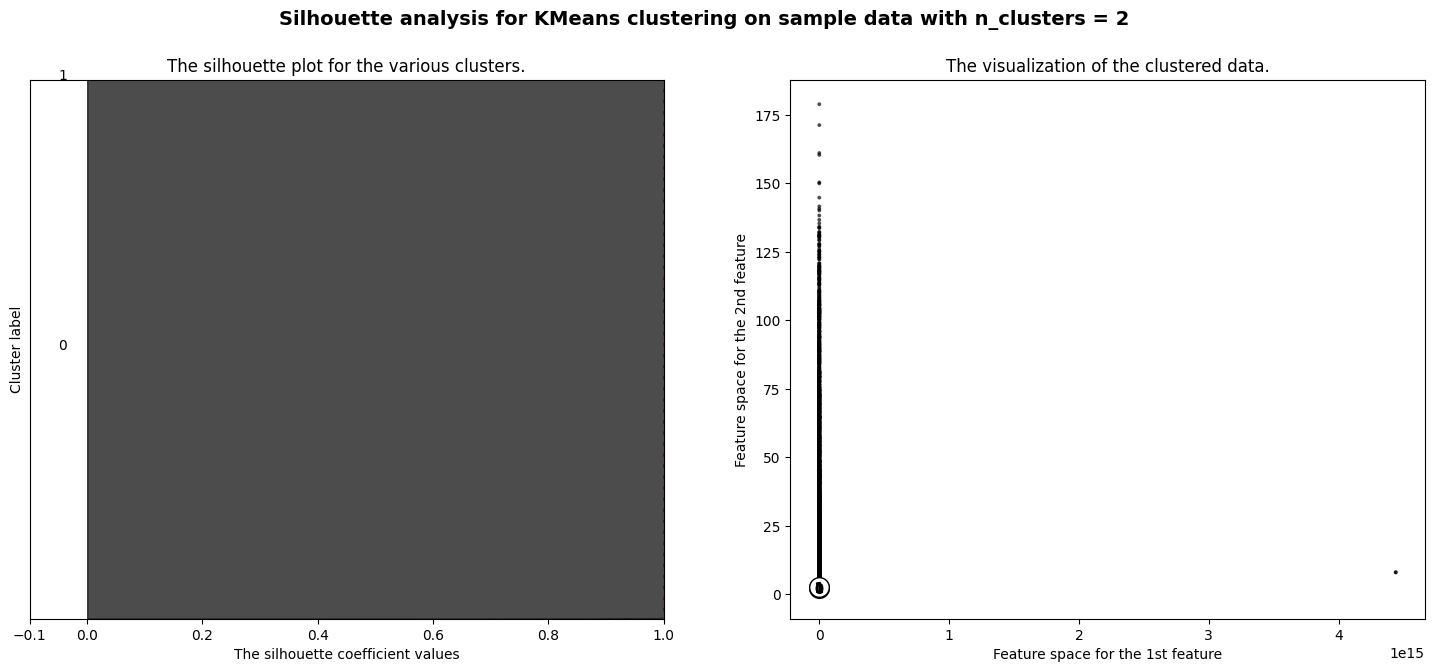

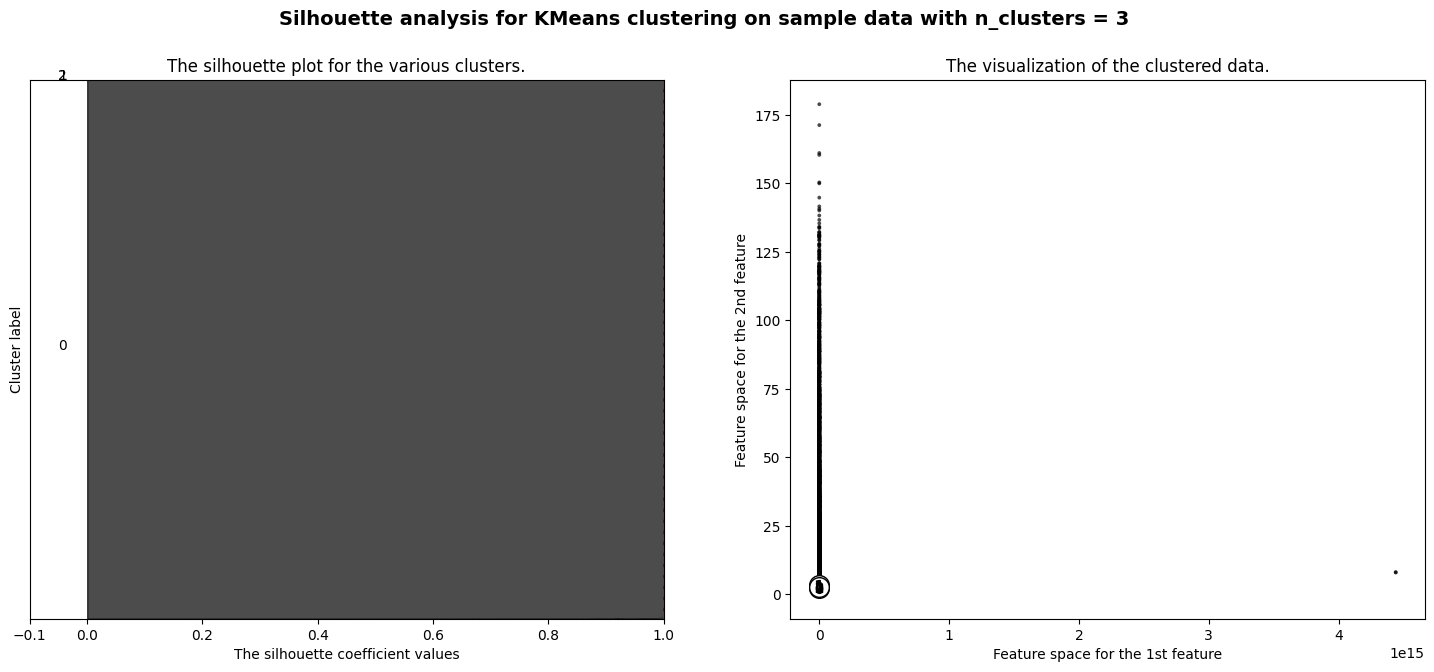

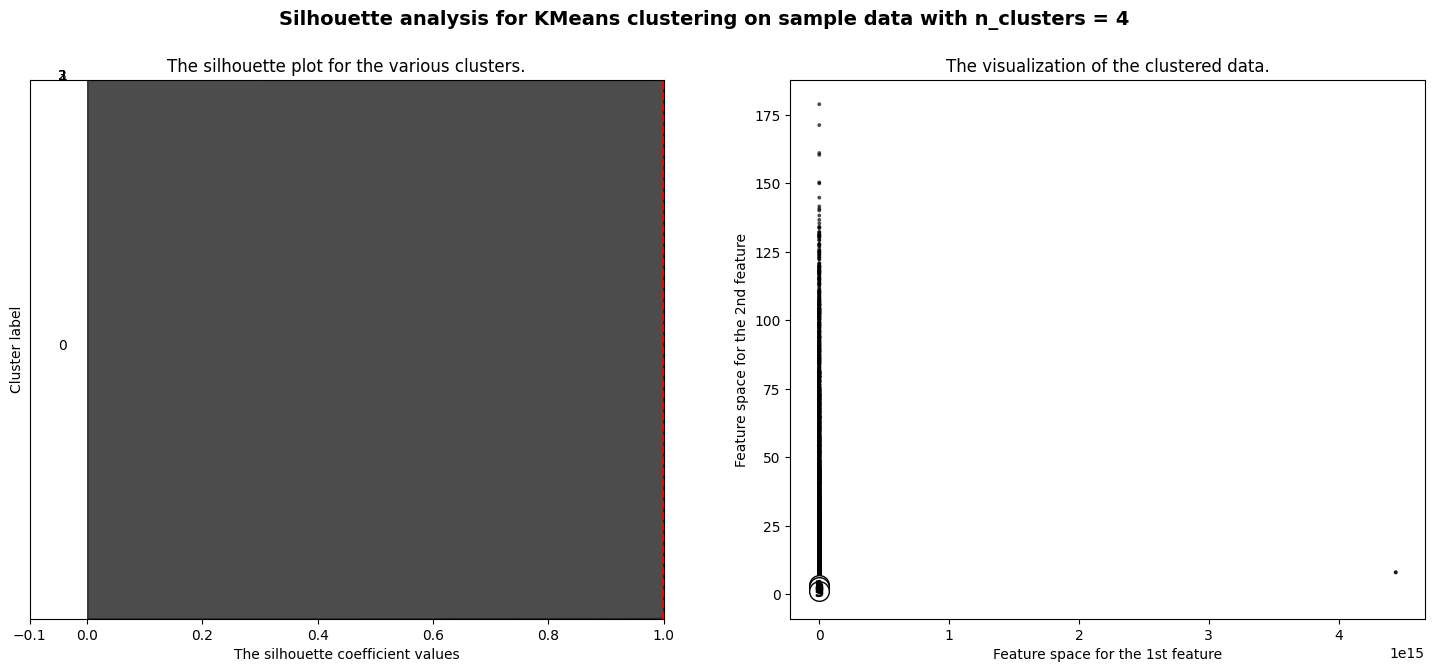

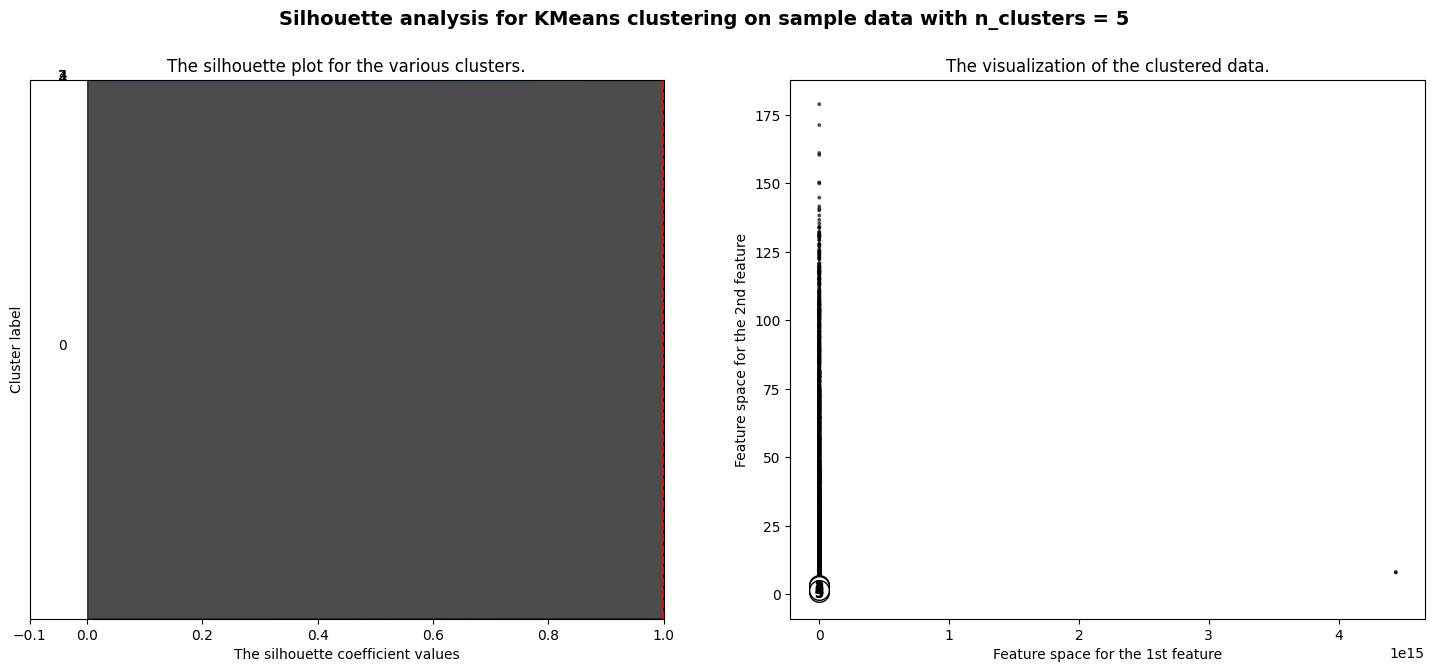

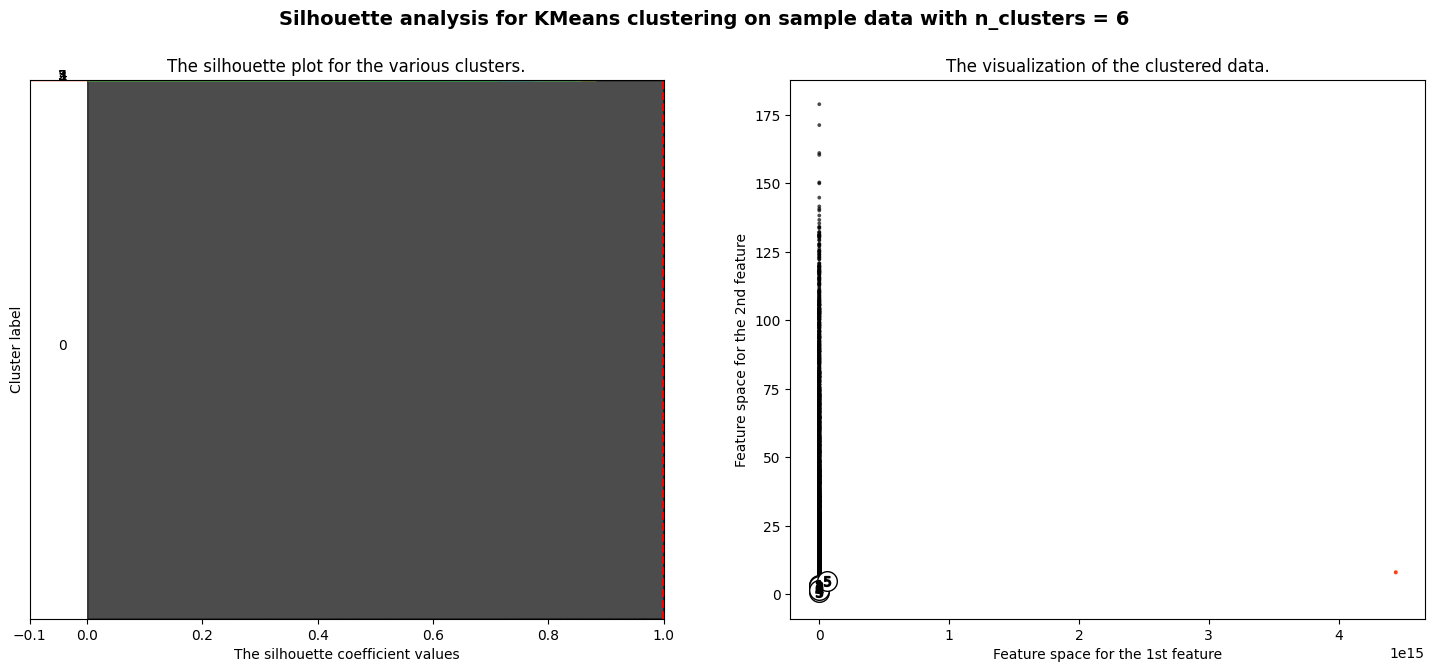

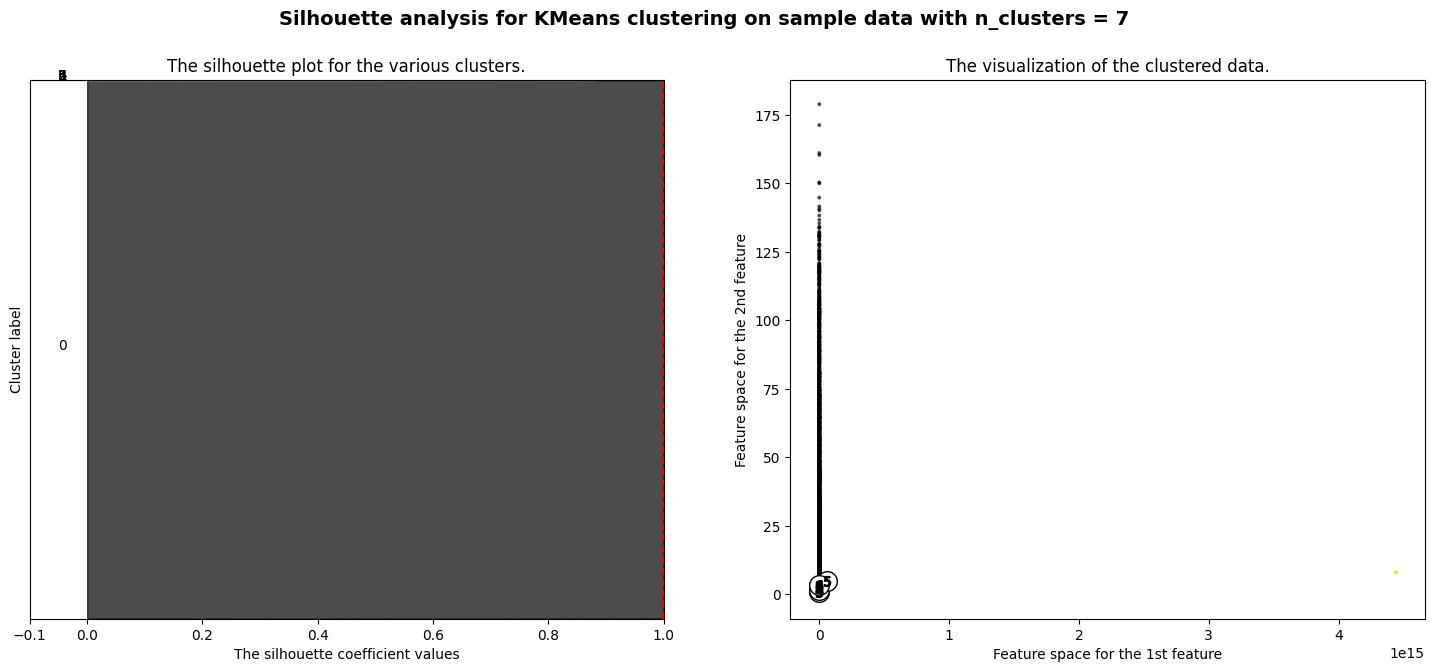

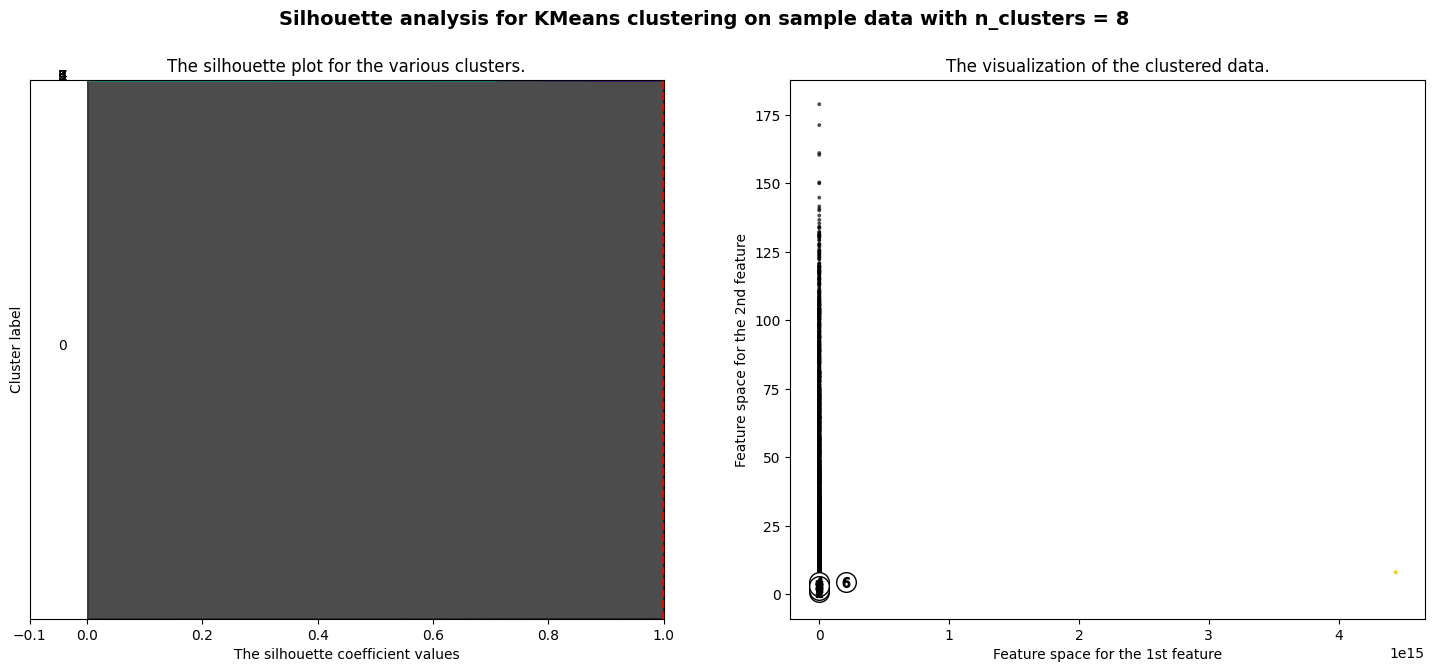

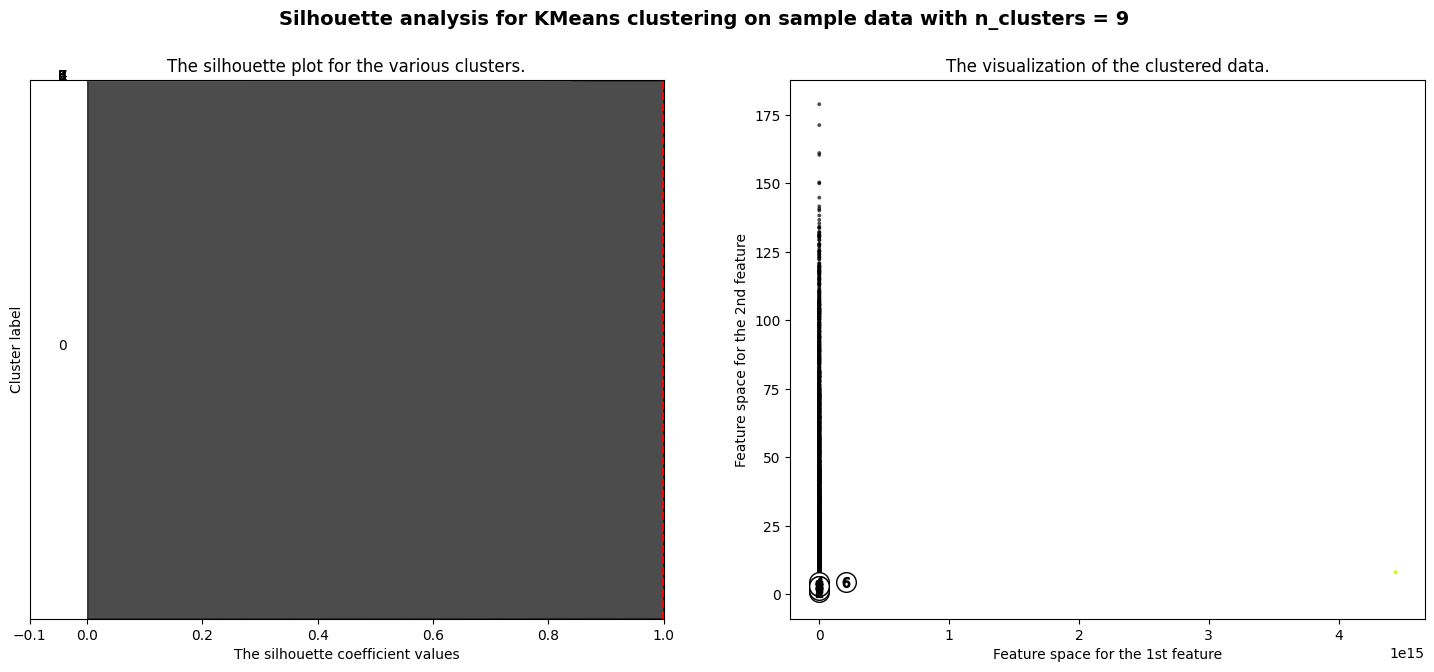

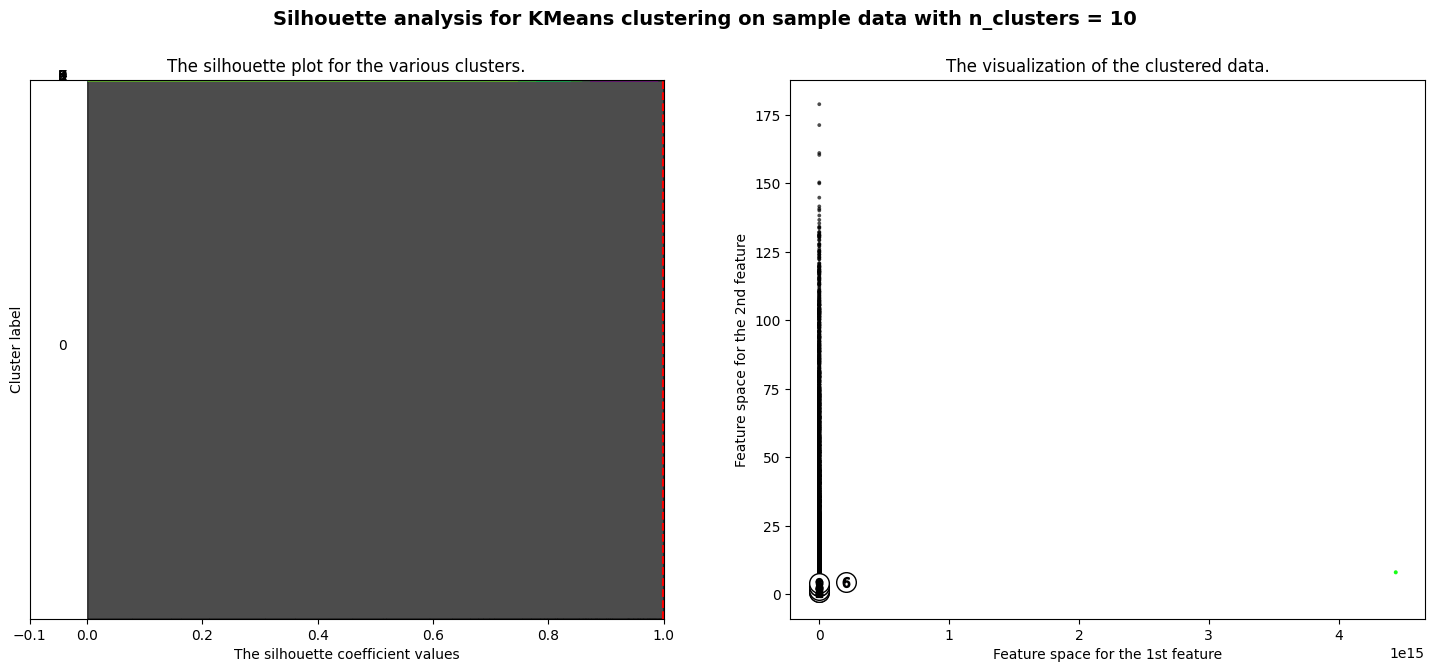

In [40]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
X = data.loc[:, list_use[:20]].dropna().values

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [64]:
data['cluster'] = np.nan
n_feat=20
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster, random_state=10, n_init="auto").fit(data.loc[:, list_use[:n_feat]].dropna())
data.loc[data[list_use[:n_feat]].dropna().index, 'cluster'] = kmeans.predict(data.loc[data[list_use[:n_feat]].dropna().index, list_use[:n_feat]])
data['cluster'] = data['cluster'].fillna(-1)

In [65]:
data.loc[index_test, ['cluster', col_target, col_target_dec, col_target_sig]].groupby('cluster').agg(['count', 'mean'])

inc_close3mean_perc5           dec_close3mean_perc5           inc_dec  \
                       count      mean                count      mean   count   
cluster                                                                         
0.0                    88576  0.074445                88576  0.069601   88576   
1.0                        1  0.000000                    1  0.000000       1   
2.0                        8  0.000000                    8  0.000000       8   

                   
             mean  
cluster            
0.0      0.144046  
1.0      0.000000  
2.0      0.000000

In [ ]:
data[col_target].mean()